# Лабораторная работа №8. Фильтрация и свертка

### Лодочникова Владлена. Группа №5130901/10202

### Упражнение 8.1

Что случится, если при увеличении ширины гауссова окна std не увеличивать число элементов в этом окне? 

Если при увеличении ширины гауссова окна (kernel) не увеличивать число элементов в этом окне, то это приведет к изменению формы функции Гаусса и, как следствие, к изменению результатов свертки этого окна с изображением.

Ширина гауссова окна (стандартное отклонение, std) определяет степень размытия, которая будет применена к изображению. Чем больше ширина окна, тем сильнее размытие. При этом, чтобы сохранить форму функции Гаусса, необходимо увеличивать число элементов в окне.

Если же не увеличивать число элементов, то функция Гаусса станет более "плоской", что приведет к менее эффективному размытию изображения. Кроме того, при сохранении небольшого числа элементов в окне при его увеличении может возникнуть проблема с вычислительной точностью, так как значения элементов будут очень малыми.

Таким образом, при увеличении ширины гауссова окна необходимо увеличивать число элементов в этом окне, чтобы сохранить форму функции Гаусса и добиться эффективного размытия изображения.

### Упражнение 8.2 

Утверждается, что преобразование Фурье гауссовой кривой - также гауссова кривая. Для дискретного преобразования Фурье это сотношение прблизительно верно. Попробуем его на нескольких примерах. Что произойдет с преобразованием Фурье, если меняется std? 

Рассмотрим как меняется преобразование Фурье в зависимости от параметра std.

Начнём с простого примера Гауссовой функции.


C:\Users\Владлена\AppData\Local\Temp\ipykernel_19760\1651571323.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=32, std=2)


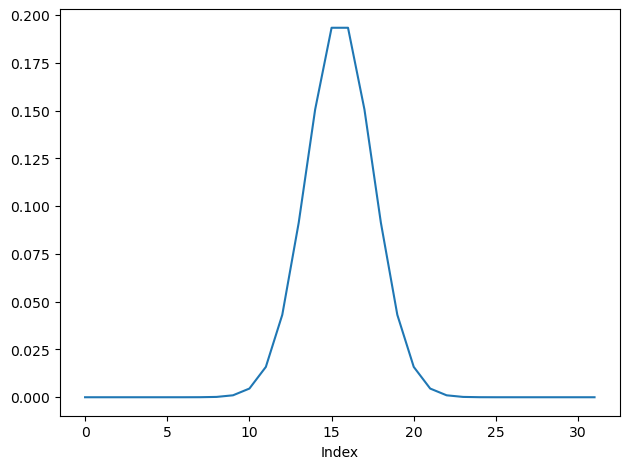

In [1]:
import scipy.signal
import matplotlib.pyplot as plt
from thinkdsp import decorate

gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

Посмотрим, как выглядит БПФ. 

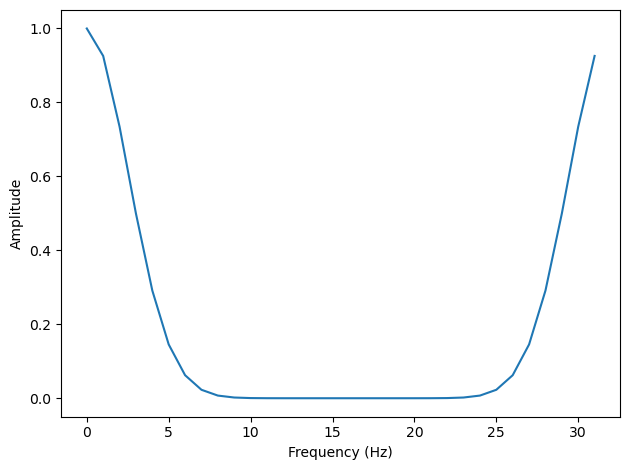

In [3]:
import numpy as np

fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

При прокрутке отрицательных частот влево сможем более четко увидеть, что это Гауссова функция. 

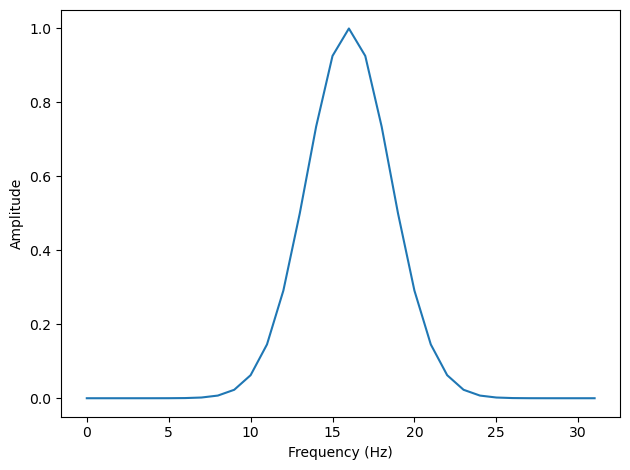

In [4]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Давайте создадим функцию, которая генерирует гауссово окно (kernel) и его частотную характеристику (БПФ) одновременно.

C:\Users\Владлена\AppData\Local\Temp\ipykernel_19760\928304877.py:3: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)
c:\Telekom\lab1\ThinkDSP\lab\lab8\thinkdsp.py:1835: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


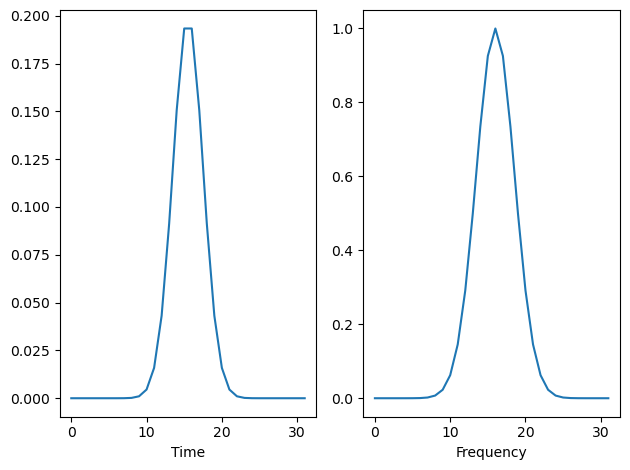

In [5]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

Создадим взаимодействие, показывающее, что происходит при изменении стандартного значения.

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider)

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

<function __main__.plot_gaussian(std)>

При изменении параметра std (стандартного отклонения) гауссова окна его преобразование Фурье также изменяется.

При увеличении std гауссово окно становится более широким, а его пик уменьшается. 

При уменьшении std гауссово окно становится более узким, а его пик увеличивается. 

Таким образом, изменение параметра std гауссова окна позволяет управлять его свойствами и эффективностью фильтрации в зависимости от требуемого результата.

### Упражнение 8.3 

В упражнениях к главе 3 изучалось влияние на утечки спектра окна Хэмминга и некоторых других, предоставляемых NumPy. Глубже понять эти окна можно, изучив их ДПФ.

В дополнение к Гауссову окну, использованному в этой главе, создадим окно Хемминга тех же размеров. Дополним окно нулями и напечатаем его ДПФ. Какое окно больше подходит для фильтра НЧ?
Полезно напечатать ДПФ с логарифмическим масштабом по у.

Поэкспериментируем с разными окнами и разными размерами этих окон.

Для начала создадим несколько окон и зададим стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие.

In [7]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

C:\Users\Владлена\AppData\Local\Temp\ipykernel_19760\698470634.py:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


Далее распечатаем окна и посмотрим на них.  

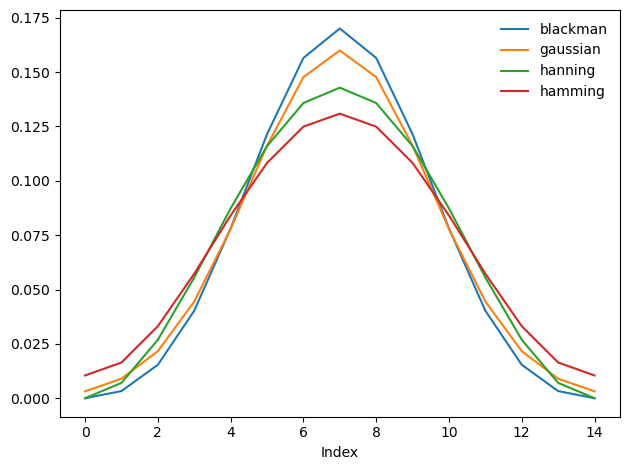

In [8]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Окна достаточно сильно похожи друг на друга. 

Теперь получим их ДПФ и рассмотрим его. 

In [9]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [10]:
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

In [13]:
from thinkdsp import SquareSignal
signal = SquareSignal(freq=10)
wave = signal.make_wave(duration=1.0, framerate=44100)

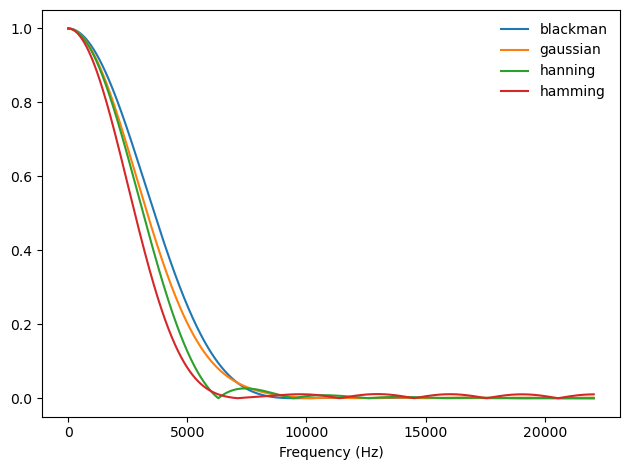

In [14]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Из сравнения окна Хэмминга, окна Блэкмана и окна Хэннинга можно сделать вывод, что окно Хэмминга имеет наиболее быстрое убывание боковых лепестков, а окно Блэкмана имеет наиболее медленное убывание. Кроме того, окно Хэннинга имеет наиболее заметные боковые лепестки по сравнению с другими окнами.



Давайте изобразим график в логарифмическом масштабе, чтобы лучше видеть детали и относительные различия между величинами.

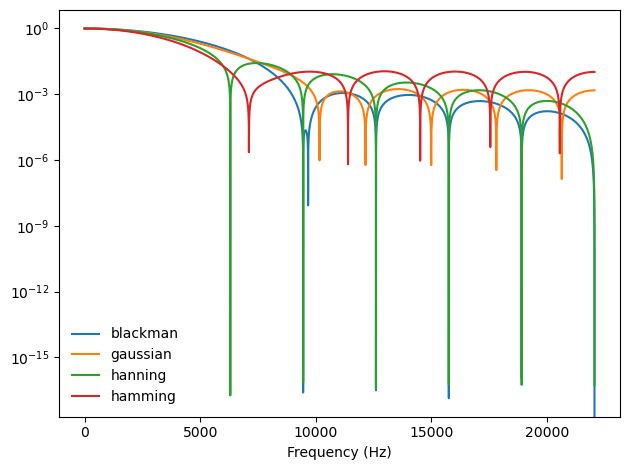

In [15]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

В логарифмическом масштабе видно, что окна Хэмминга и Хэннинга имеют более быстрое убывание боковых лепестков, чем окна Хэмминга-Ханна и Блэкмана. Это означает, что при применении этих окон к сигналу, боковые лепестки спектра будут уменьшаться быстрее, чем при применении других окон. Это может быть полезно для уменьшения уровня шума и искажений в сигнал